## Algorithm Evaluation

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m=df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y(Survived)

Drop statistically insignificant feature- PassengerId,Name,Ticket

Drop Columns containing lots of missing values- Cabin

Target Feature - Survived

In [10]:
X=df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
Y=df[['Survived']]

In [11]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Seperate cat and con features for X

In [13]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [14]:
cat

['Sex', 'Embarked']

In [15]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Create preprocessing pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [21]:
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                         ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [22]:
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [23]:
X_pre=pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Apply train test split

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X_pre,Y,test_size=0.3,random_state=42)

In [25]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
445,-1.566107,-1.949034,-0.474545,2.008933,0.999770,0.0,1.0,0.0,0.0,1.0
650,0.827377,-0.104637,-0.474545,-0.473674,-0.489442,0.0,1.0,0.0,0.0,1.0
172,0.827377,-2.179583,0.432793,0.767630,-0.424256,1.0,0.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0
314,-0.369365,1.048110,0.432793,0.767630,-0.119886,0.0,1.0,0.0,0.0,1.0


In [26]:
ytrain.head()

,Survived
445,1
650,0
172,1
450,0
314,0


In [27]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [28]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [29]:
xtrain.shape

(623, 10)

In [30]:
xtest.shape

(268, 10)

### Preprocessing Completed

### Algo Evaluation

1.KNN and SVM should be used for small datasets only where data is below 1000 rows

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [32]:
dct={'Logistic':LogisticRegression(),
     'Decision Tree':DecisionTreeClassifier(),
     'Random Forest':RandomForestClassifier(),
     'Gradient Boost':GradientBoostingClassifier(),
     'KNN':KNeighborsClassifier(),
     'SVM':SVC()}

In [34]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

### Fit the model and evaluate the results

Evaluate model with f1 score

![image.png](attachment:image.png)

In [35]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [40]:
tr=[]
tr_cv=[]
ts=[]
for name,model in dct.items():
    # fit the model
    model.fit(xtrain,ytrain)
    #predict results for train and test
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    # calculate f1 score in train and test
    f1_tr=f1_score(ytrain,ypred_tr)
    f1_ts=f1_score(ytest,ypred_ts)
    # 5- fold cross validation on traning
    scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    f1_cv=scores.mean()
    # Append above results in tr,ts,tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # print above results for each model
    print(f'Model Name : {name}\n')
    print(f'Train F1:{f1_tr:.4f}')
    print(f'Train F1 Cross Validation : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n================================================================')


Model Name : Logistic

Train F1:0.7133
Train F1 Cross Validation : 0.7786
Test F1 : 0.7606

Model Name : Decision Tree

Train F1:0.9735
Train F1 Cross Validation : 0.7423
Test F1 : 0.6991

Model Name : Random Forest

Train F1:0.9738
Train F1 Cross Validation : 0.7721
Test F1 : 0.7097

Model Name : Gradient Boost

Train F1:0.8638
Train F1 Cross Validation : 0.7972
Test F1 : 0.7363

Model Name : KNN

Train F1:0.7872
Train F1 Cross Validation : 0.7696
Test F1 : 0.7228

Model Name : SVM

Train F1:0.7721
Train F1 Cross Validation : 0.7999
Test F1 : 0.7707



### Save above result in dataframe

In [41]:
tr

[0.7133182844243793,
 0.9734513274336283,
 0.9737991266375545,
 0.863849765258216,
 0.7871853546910755,
 0.772093023255814]

In [42]:
ts

[0.7605633802816901,
 0.6991150442477877,
 0.7096774193548386,
 0.7363184079601989,
 0.7227722772277227,
 0.7707317073170732]

In [43]:
tr_cv

[0.7785775608737076,
 0.7422700747952413,
 0.7721038451172217,
 0.7971811893308001,
 0.769575621470407,
 0.7999327233126278]

In [44]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier(),
 'KNN': KNeighborsClassifier(),
 'SVM': SVC()}

In [45]:
list(dct.keys())

['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM']

In [46]:
results_dct={'Model_name':list(dct.keys()),
             'Train F1':tr,
             'Test F1':ts,
             'Train F1 CV':tr_cv}

In [47]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.713318,0.760563,0.778578
1,Decision Tree,0.973451,0.699115,0.742270
2,Random Forest,0.973799,0.709677,0.772104
3,Gradient Boost,0.863850,0.736318,0.797181
4,KNN,0.787185,0.722772,0.769576
5,SVM,0.772093,0.770732,0.799933


In [49]:
results_df = results_df.sort_values(by='Test F1',ascending=False)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
5,SVM,0.772093,0.770732,0.799933
0,Logistic,0.713318,0.760563,0.778578
3,Gradient Boost,0.863850,0.736318,0.797181
4,KNN,0.787185,0.722772,0.769576
2,Random Forest,0.973799,0.709677,0.772104
1,Decision Tree,0.973451,0.699115,0.742270


### Create the SVM Model

In [50]:
best_model = SVC(probability=True)
best_model.fit(xtrain,ytrain)

SVC(probability=True)

In [51]:
best_model.score(xtrain,ytrain)

0.8426966292134831

In [52]:
best_model.score(xtest,ytest)

0.8246268656716418

### Predict the results for train and test

In [53]:
ypred_tr=best_model.predict(xtrain)
ypred_ts=best_model.predict(xtest)

In [54]:
ypred_tr[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [55]:
ytrain.head()

,Survived
445,1
650,0
172,1
450,0
314,0


In [56]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [57]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Cretae a confusion matrix

In [58]:
c = best_model.classes_

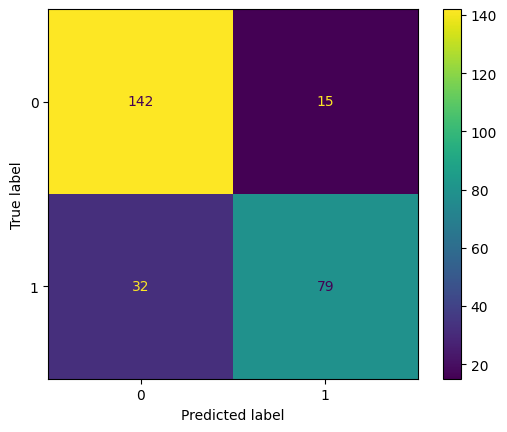

In [59]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=c)
cfd.plot()

### Print Classification Report

In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



### Showing ROC AUC Curve for both train and test data

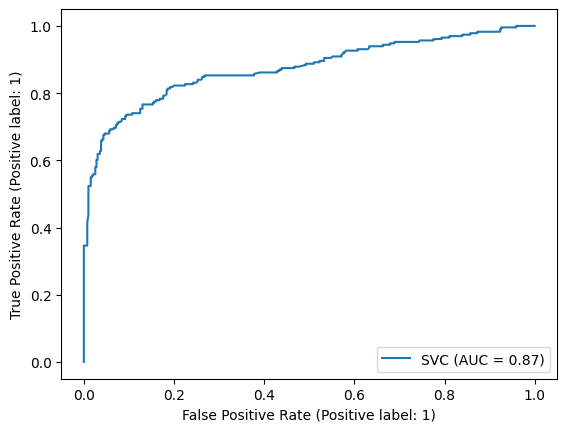

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

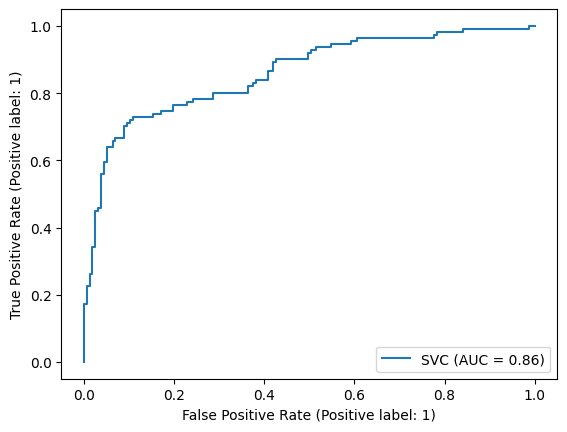

In [62]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

### Cross validated roc_auc score

In [63]:
auc_scores=cross_val_score(best_model,xtrain,ytrain,cv=10,scoring='roc_auc')
auc_scores

array([0.80128205, 0.76576087, 0.90543478, 0.91415831, 0.81716834,
       0.79654404, 0.79598662, 0.85953177, 0.77926421, 0.91638796])

In [64]:
auc_scores.mean()

0.8351518952062429

### If ROC_AUC Score > 0.8 then model created is good model

#### Predict out of sample data

In [65]:
xnew=pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [68]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Out of sample data always apply pre.transform

In [69]:
xnew_pre=pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


### Predict the survival

In [70]:
preds=best_model.predict(xnew_pre)
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
best_model.classes_

array([0, 1], dtype=int64)

In [72]:
probs=best_model.predict_proba(xnew_pre)[:,1]
probs[0:5]

array([0.1599094 , 0.4947407 , 0.15209605, 0.15218624, 0.51228326])

### Save above results in dataframe

In [73]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [74]:
df_final['Survived_pred']=preds
df_final['Survived_prob']=probs

In [75]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.159909
1,893,1,0.494741
2,894,0,0.152096
3,895,0,0.152186
4,896,1,0.512283
...,...,...,...
413,1305,0,0.152846
414,1306,1,0.856175
415,1307,0,0.160476
416,1308,0,0.152846


### Save above results to results.csv

In [77]:
df_final.to_csv('Results.csv',index=False)

In [78]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    268
1    150
Name: count, dtype: int64

<Axes: title={'center': 'Survived Prediction Countplot'}, xlabel='Survived_pred'>

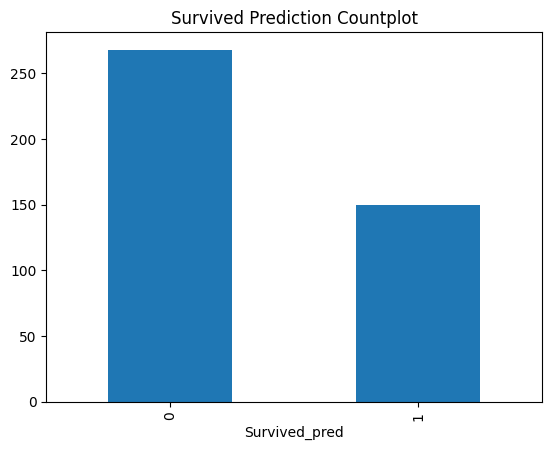

In [79]:
df_final['Survived_pred'].value_counts().plot(kind='bar',title='Survived Prediction Countplot')